In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [6]:
df=pd.read_csv("Social_Network_Ads.csv")

In [10]:
df.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


In [12]:
!pip install ydata-profiling

In [14]:
from ydata_profiling import ProfileReport
port=ProfileReport(df)
port.to_file("output_file.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
port

In [20]:
df.shape

(400, 5)

In [24]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [22]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [30]:
df["Gender"]=label.fit_transform(df["Gender"])

In [90]:
df.sample(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
374,15793890,0,19,80000,0
81,15668385,1,21,42000,0


In [34]:
X=df.drop(columns="Purchased",axis=1)
Y=df["Purchased"]

In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=2)

In [38]:
scaled=StandardScaler()

In [42]:
scaled.fit(X_train,Y_train)

StandardScaler()

In [44]:
scaled.mean_

array([1.56937214e+07, 4.75000000e-01, 1.97642857e+01, 6.99000000e+04])

In [53]:
X_train_scaled=scaled.transform(X_train)

In [55]:
X_test_scaled=scaled.transform(X_test)

In [61]:
X_train_scaled
#X_test_scaled

array([[-1.00877886,  1.05131497,  0.02273414, -0.26389006],
       [ 0.05042762, -0.95118973,  0.79431698, -1.42026223],
       [-1.73012503, -0.95118973, -0.26660943, -0.38249233],
       ...,
       [-1.34143652, -0.95118973, -1.71332725, -1.39061166],
       [ 0.05399595,  1.05131497, -0.84529656,  0.29947074],
       [ 1.30875202,  1.05131497, -0.84529656,  2.3157094 ]])

In [70]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [76]:
X_train.head(2)

,User ID,Gender,Age,EstimatedSalary
112,15619653,1,20,61000
209,15697424,0,28,22000


In [78]:
X_train_scaled.head(1)

,User ID,Gender,Age,EstimatedSalary
0,-1.008779,1.051315,0.022734,-0.26389


In [88]:
np.round(X_train.describe())

,User ID,Gender,Age,EstimatedSalary
count,280.0,280.0,280.0,280.0
mean,15693721.0,0.0,20.0,69900.0
std,73555.0,1.0,10.0,33787.0
min,15566689.0,0.0,0.0,15000.0
25%,15624694.0,0.0,12.0,43750.0
50%,15696350.0,0.0,19.0,70500.0
75%,15758144.0,1.0,28.0,87000.0
max,15815236.0,1.0,42.0,150000.0


In [86]:
np.round(X_train_scaled.describe())

,User ID,Gender,Age,EstimatedSalary
count,280.0,280.0,280.0,280.0
mean,0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0
min,-2.0,-1.0,-2.0,-2.0
25%,-1.0,-1.0,-1.0,-1.0
50%,0.0,-1.0,-0.0,0.0
75%,1.0,1.0,1.0,1.0
max,2.0,1.0,2.0,2.0


In [110]:
%matplotlib inline
import matplotlib.pyplot as plt


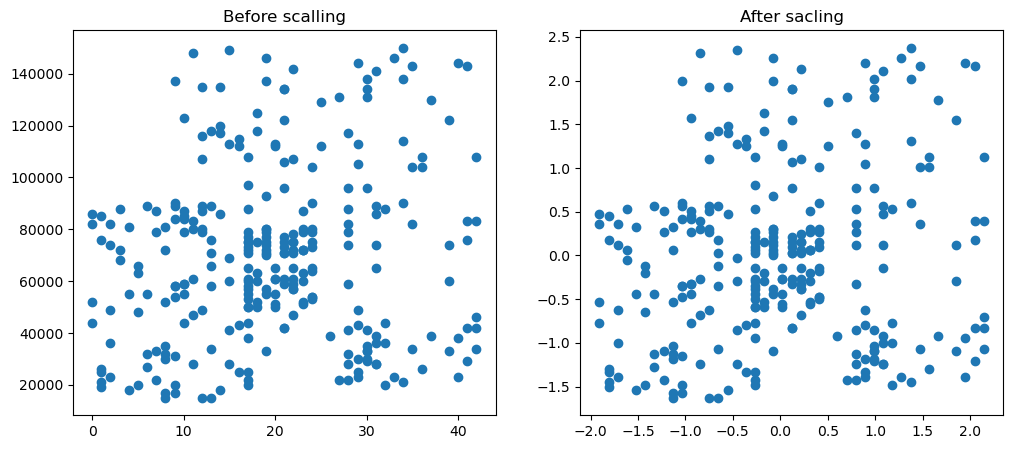

In [119]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.scatter(X_train["Age"],X_train["EstimatedSalary"])
ax1.set_title("Before scalling")
ax2.scatter(X_train_scaled["Age"],X_train_scaled["EstimatedSalary"])
ax2.set_title("After sacling")
plt.show()

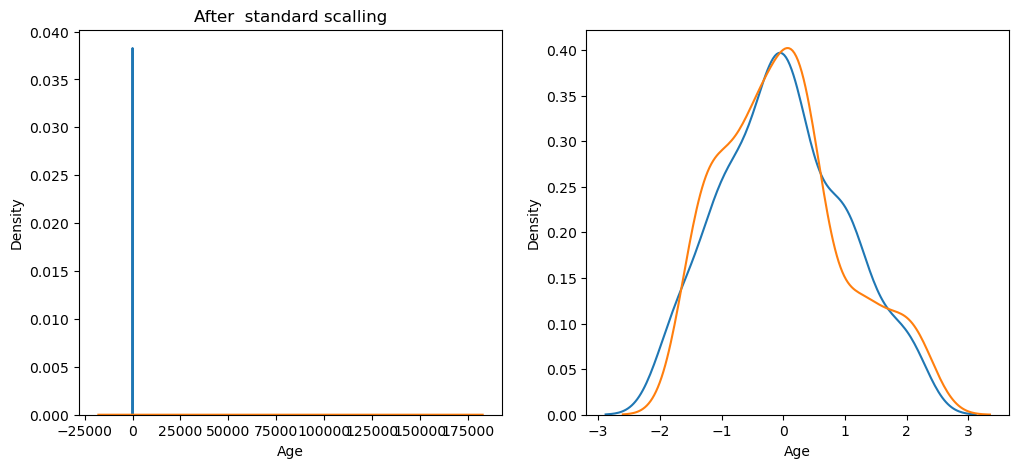

In [133]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title("Before scalling")
sns.kdeplot(X_train["Age"],ax=ax1)
sns.kdeplot(X_train["EstimatedSalary"],ax=ax1)

ax1.set_title("After  standard scalling")
sns.kdeplot(X_train_scaled["Age"],ax=ax2)
sns.kdeplot(X_train_scaled["EstimatedSalary"],ax=ax2)

plt.show()

In [138]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [140]:
lr.fit(X_train,Y_train)
lr_scaled.fit(X_train_scaled,Y_train)

LogisticRegression()

In [142]:
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [148]:
print("Actual",accuracy_score(Y_test,y_pred))
print("Scaled",accuracy_score(Y_test,y_pred_scaled))

Actual 0.8416666666666667
Scaled 0.8416666666666667


In [159]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
dt_scaled.fit(X_train_scaled,Y_train)
DecisionTreeClassifier()
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)
print("Actual",accuracy_score(Y_test,y_pred))
print("Scaled",accuracy_score(Y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8583333333333333
